# Preprocessing Banjir

## Preparations

In [23]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [24]:
# Directory for all related files
dataset_dir = 'filtered/'
os.makedirs(dataset_dir, exist_ok=True)

In [25]:
os.listdir(dataset_dir)

['Kecelakaan.csv', 'Kebakaran.csv', 'Gempa Bumi.csv', 'Banjir.csv']

## Loading Dataset

In [28]:
df = pd.read_csv(os.path.join(dataset_dir, 'Banjir.csv'))
print(df.shape)
df.head()

(2812, 1)


,title
0,"Sungai Ciliwung Meluap, Ratusan Rumah di Bogor..."
1,"Andalkan Perahu Gabus, Warga Cawang Terbiasa d..."
2,TNI Siapkan Posko Bantu Korban Banjir di Kampu...
3,"Banjir Sepinggang di Kebon Manggis Matraman, W..."
4,KP2C : Situasi Kali Bekasi aman dari banjir


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [29]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,title
0,"sungai ciliwung meluap, ratusan rumah di bogor..."
1,"andalkan perahu gabus, warga cawang terbiasa d..."
2,tni siapkan posko bantu korban banjir di kampu...
3,"banjir sepinggang di kebon manggis matraman, w..."
4,kp2c : situasi kali bekasi aman dari banjir


In [30]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,title,stem
0,"sungai ciliwung meluap, ratusan rumah di bogor...",sungai ciliwung luap ratus rumah di bogor banjir
1,"andalkan perahu gabus, warga cawang terbiasa d...",andal perahu gabus warga cawang biasa dengan b...
2,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...
3,"banjir sepinggang di kebon manggis matraman, w...",banjir pinggang di kebon manggis matraman warg...
4,kp2c : situasi kali bekasi aman dari banjir,kp2c situasi kali bekas aman dari banjir


In [31]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,title,stem,tokens
0,"sungai ciliwung meluap, ratusan rumah di bogor...",sungai ciliwung luap ratus rumah di bogor banjir,"[sungai, ciliwung, luap, ratus, rumah, di, bog..."
1,"andalkan perahu gabus, warga cawang terbiasa d...",andal perahu gabus warga cawang biasa dengan b...,"[andal, perahu, gabus, warga, cawang, biasa, d..."
2,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...,"[tni, siap, posko, bantu, korban, banjir, di, ..."
3,"banjir sepinggang di kebon manggis matraman, w...",banjir pinggang di kebon manggis matraman warg...,"[banjir, pinggang, di, kebon, manggis, matrama..."
4,kp2c : situasi kali bekasi aman dari banjir,kp2c situasi kali bekas aman dari banjir,"[kp2c, situasi, kali, bekas, aman, dari, banjir]"


In [32]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,title,stem,tokens,tokens_clean
0,"sungai ciliwung meluap, ratusan rumah di bogor...",sungai ciliwung luap ratus rumah di bogor banjir,"[sungai, ciliwung, luap, ratus, rumah, di, bog...","[sungai, ciliwung, luap, ratus, rumah, bogor, ..."
1,"andalkan perahu gabus, warga cawang terbiasa d...",andal perahu gabus warga cawang biasa dengan b...,"[andal, perahu, gabus, warga, cawang, biasa, d...","[andal, perahu, gabus, warga, cawang, banjir]"
2,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...,"[tni, siap, posko, bantu, korban, banjir, di, ...","[tni, posko, bantu, korban, banjir, kampung, m..."
3,"banjir sepinggang di kebon manggis matraman, w...",banjir pinggang di kebon manggis matraman warg...,"[banjir, pinggang, di, kebon, manggis, matrama...","[banjir, pinggang, kebon, manggis, matraman, w..."
4,kp2c : situasi kali bekasi aman dari banjir,kp2c situasi kali bekas aman dari banjir,"[kp2c, situasi, kali, bekas, aman, dari, banjir]","[kp2c, situasi, kali, bekas, aman, banjir]"


In [33]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,title,stem,tokens,tokens_clean,merged
0,"sungai ciliwung meluap, ratusan rumah di bogor...",sungai ciliwung luap ratus rumah di bogor banjir,"[sungai, ciliwung, luap, ratus, rumah, di, bog...","[sungai, ciliwung, luap, ratus, rumah, bogor, ...",sungai ciliwung luap ratus rumah bogor banjir
1,"andalkan perahu gabus, warga cawang terbiasa d...",andal perahu gabus warga cawang biasa dengan b...,"[andal, perahu, gabus, warga, cawang, biasa, d...","[andal, perahu, gabus, warga, cawang, banjir]",andal perahu gabus warga cawang banjir
2,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...,"[tni, siap, posko, bantu, korban, banjir, di, ...","[tni, posko, bantu, korban, banjir, kampung, m...",tni posko bantu korban banjir kampung melayu
3,"banjir sepinggang di kebon manggis matraman, w...",banjir pinggang di kebon manggis matraman warg...,"[banjir, pinggang, di, kebon, manggis, matrama...","[banjir, pinggang, kebon, manggis, matraman, w...",banjir pinggang kebon manggis matraman warga e...
4,kp2c : situasi kali bekasi aman dari banjir,kp2c situasi kali bekas aman dari banjir,"[kp2c, situasi, kali, bekas, aman, dari, banjir]","[kp2c, situasi, kali, bekas, aman, banjir]",kp2c situasi kali bekas aman banjir


In [47]:
df[df['stem'].str.contains('pesan')]

,title,stem,tokens,tokens_clean,merged


In [45]:
keywords = '|'.join(['hujat', 'air mata', 'puji', 'pesan', 'komentar', 'diskon', 'promo', 'kritik', 'dukung', 'doa', 'rezeki', 'protes'])
df = df[~df['title'].str.contains(keywords)].reset_index(drop=True)

In [48]:
# Mengecek jumlah data dalam DataFrame
jumlah_data = df.shape[0]
print("Jumlah data dalam DataFrame adalah:", jumlah_data)

Jumlah data dalam DataFrame adalah: 2743


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

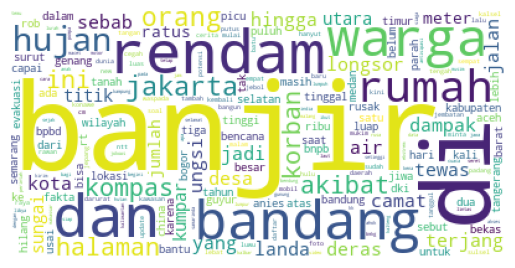

In [49]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

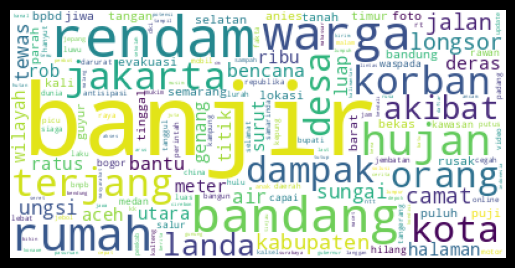

In [21]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [22]:
# Simpan output ke dalam CSV
df.to_csv('Banjir-2018-2023-pre.csv', index=False)